<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 04

## **Pytorch Workflow**

In [ ]:
what_were_covering = {
    1:  "data (prepare and load)",
    2:  "build model",
    3:  "fitting the model to data (training)",
    4:  "making predictions and evaluating a model (inference)",
    5:  "saving and loading a model",
    6:  "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.3.0+cu121'

###  1. **Data (preparing and loading)**

Data can be almost anything... in machine learning.


  *  Excel spreadsheet
  *  Images of any kind
  *  Videos (Youtube has lots of data)
  *  Audio like songs or podcasts
  *  DNA
  *  Text

###**Linear regression**

Machine learning is a game of two parts:

1. Get data into numerical representations
2. Build a model to learn patterns in that numerical representation.


To showcase this let's create some *known* data using liner regression formula

We will use a linear regression formula to make a straight line with known **Parameters**.


In [ ]:
# create known paramenters

weight = 0.7
bias =  0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

Y= weight * X + bias

X[:10],  Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

 #### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

 Let's create a training and test set with our data.

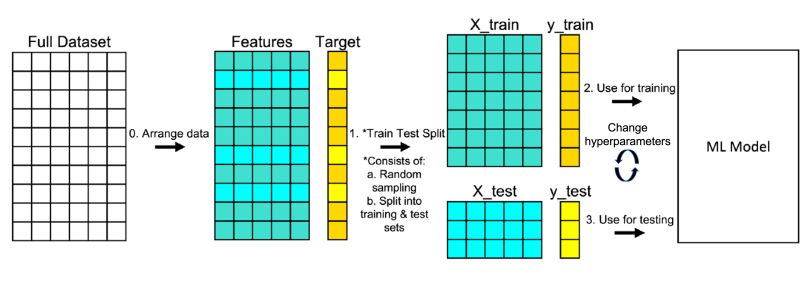

In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
# Create a train/ test split
train_split = int(0.8 * len(X))
print(train_split)


40


In [ ]:
x_train, y_train = X[:train_split], Y[:train_split]
#x_train, y_train
x_test,y_test = X[train_split:], Y[train_split:]
#x_test, y_test

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(
    train_data = x_train,
    train_labels = y_train,
    test_data = x_test,
    test_label = y_test,
    predictions= None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s= 4, label =" Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_label, c= "g", s= 4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data,predictions, c="r", s= 4, label = "Predictions")


  # Show the legend
  plt.legend(prop={"size":14});




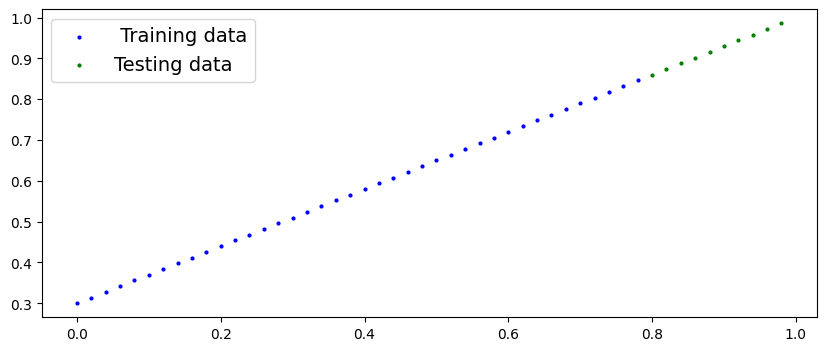

In [ ]:
plot_predictions()

#Day 5

## 2. Build model

**What our model does**
*  Start with random values (weights and bias)
*  Look at training data and adjust the random values to better represent (orget closer to ) the ideal calues (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1.  Gradient descent
2.  Backpropagation

###**Gradient descent**
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning, expecially for training neural networks. The goal is to find the parameters (weights) that minimize the difference between the predicted output and the actual output.

***How it works***
*  **Cost Function**: Imagine you are training a model to predict housing prices. The cost functions measures how wrong your model's prediction are compared to the actual prices. It acts as a guide for the optimization process. Common cost functions include mean squared error (MSE) or cross- entropy for classification problems.

*  **Parameters and Gradients:**
    *  The gradient is the vector of partial derivatives of the cost function with respect to the model's parameter's.

    *  The gradient of the cost function with resprect to a praameter tells you how much changing that parameter will affect the overall error.
    
    * It points inthe direction of steepest descent (decrease) of the cost function.

*  **Learning rate**: This is a hyperparameter that determines the step size at each iteration while moving towards a minimum of the cost function . A small learning rate migght make the algorithm skow to converge while a large learning rate might cause it to overshoot the minimum.

**The gradient descent process**:
1. calulates the cost function based on the current parameter values.

2. Calculates the gradients of the cost function with respect to each parameter.

3. Update each parameter by subtracting a small learning rate times the corresponding gradient. The learning rate controls the step size in the direction of the negative gradient.

4. Repeat these steps until the cost function converges (stops significantly decreasing ) or reaches a maximum number of iterations.


***In essence, gradient descent  is like rolling a ball down a bumpy landscape. You iteratively adjust ball's direction based on the steepest descent to reach the valley (minimum) representing the best model performance.***



#### **Mathematical Formulation for Gradient Descent in Linear Regression**

For a simple linear regression model with parameters
𝑤
w (weights) and
𝑏
b (bias), the gradient descent update rule is:


`w:=w−α
∂w
∂J(w)`

​`
𝑏
:
=
𝑏
−
𝛼
∂
𝐽
(
𝑏
)
∂
𝑏
b:=b−α
∂b
∂J(b)`

Where:

 * `α` is the learning rate.

* `J(w)` is the cost function.


**Example: Linear Regression**

Consider a linear regression model with a cost function
`J(w,b)` defined as the Mean Squared Error (MSE):

Consider a linear regression model with a cost function \( J(w, b) \) defined as the Mean Squared Error (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i)^2
$$

Where:
- \( m \) is the number of training examples.
- \( h(x_i) = w \cdot x_i + b \) is the hypothesis or predicted value.

The gradients of the cost function with respect to \( w \) and \( b \) are:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_i
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i)
$$

The parameters are updated as follows:

$$
w := w - \alpha \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_i
$$

$$
b := b - \alpha \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i)
$$


In [ ]:
from torch import nn
 # Create liner regression model class


class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights  = nn.Parameter(torch.randn( 1, requires_grad = True,dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))



    #  Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias   # This is the linear regression formula


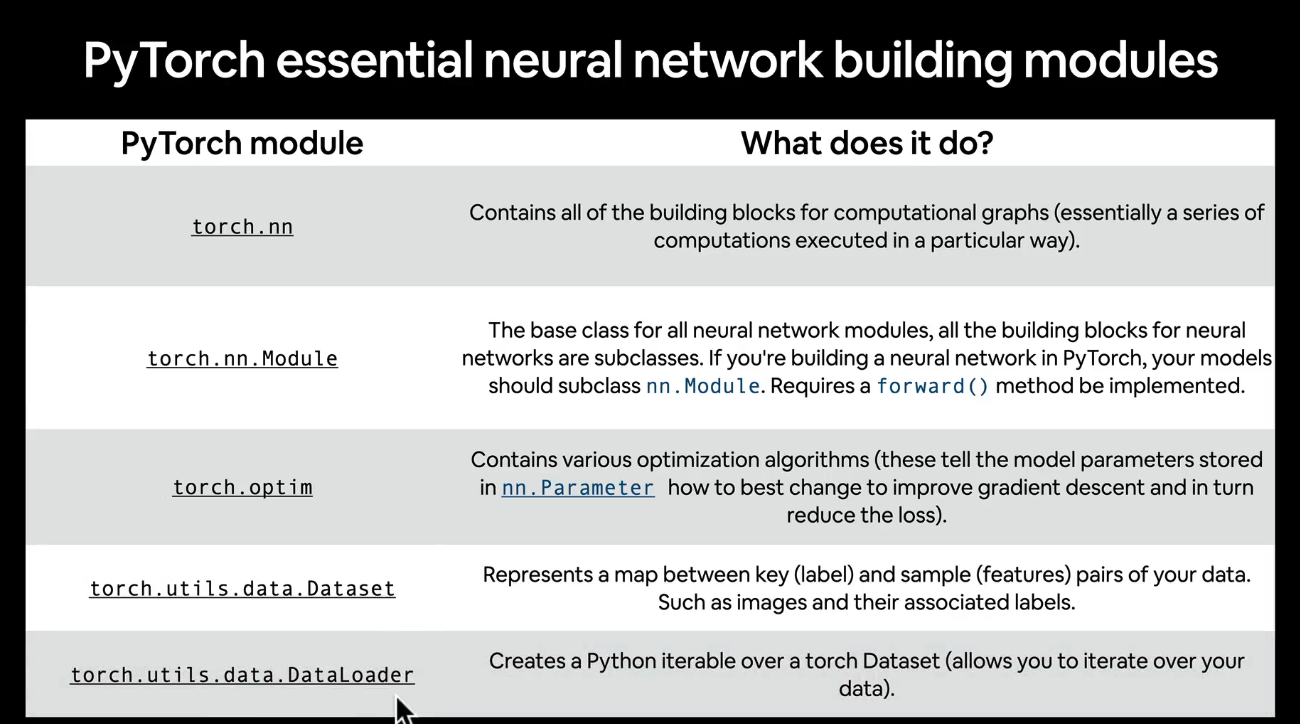

### Checking the contents of out PyTorch model

We can check the model parameters or what's inside out model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_O = LinearRegressionModel()

# Check out the parameters
list(model_O.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###**torch.inference_mode( )**:

PyTorch inference mode is a context manager that allows you to perform model inference (i.e making predictions with trained model) more efficiently. Inference mode is specifically designed to improve the performance of you model during inference by disabling certain features that are only needed during training, such as gradient computation and autograd.


**Key features and benefits**

1. **Disbles Gradient Calculation**: During inference, gradients are not required. Disabling gradient calculation reduces memory usage and speeds up computaion.

2. **Optimizes memory usages**: By disabling autograd, PyTorch can avoid storing intermediate results that are onlynecessary for back propagation during training.

3. **simplifies code**: Using inference mode  makes it explicit that the code block is intended for inference, which can help prevent accidental modifications to the  model's parameters.


**Comparison with `torch.no_grad()`**:

   *  `torch.no_grad()` : Disables gradient calculation, but autograd is still enabled. SUitable for most inference tasks and prevents gradient calculation, thus saving memory.

   *  `torch.inference_mode()` : Fully disables autograd, providing a slight performance boost over `torch.no_grad()`. It is more efficient and recommended for purely scenarios.

In [ ]:
with torch.inference_mode():
  y_preds = model_O(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

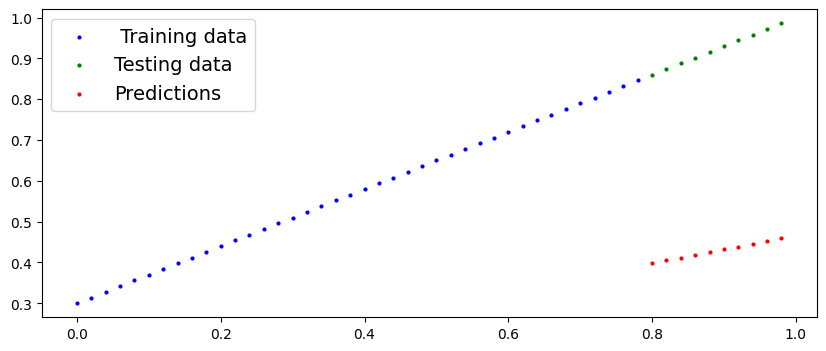

In [ ]:
with torch.no_grad():
  y_preds = model_O(x_test)

y_preds
plot_predictions(predictions=y_preds)

##**Training model**

One way to measure how poor or how wrong you models predictions are is to use a loss function.

  *  Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

   *  **Loss Function**: A funciton to measure how wrong your model's predictions are to the ideal outputs, lower is better.

   *  **Optimizer** : Takes into account the loss of a model and adjusts the models's paramenters(e.g weight and bias)
      
      *  Inside the optimizer you'll often have to set two parameters:
        
         *  `params` : the model parameters you'd like to optimize, for example `params =model_O.parameters()`

         *  `lr` (learning rate) : the learning rate is hyperparameter that defines how big/small the optimizer changes the parameters witheach step (a small `lr` results in small changes, a large `lr` results in large changes)

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_O.parameters(), lr=0.01)

# Day 6

## Building a training loop  (and a testing loop ) in pytorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

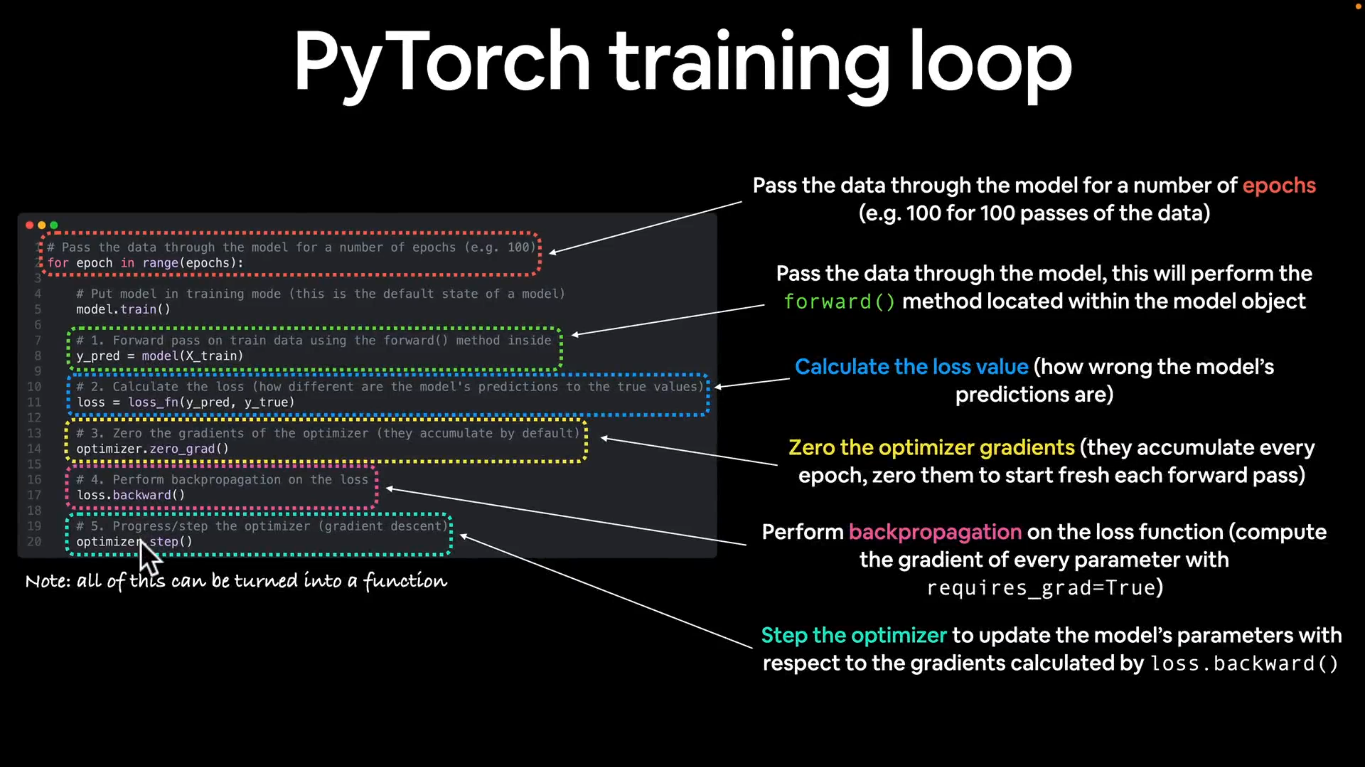

In [ ]:
model_O.parameters()

<generator object Module.parameters at 0x7829057151c0>

In [ ]:
#  An epoch is one loop through the data...

epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# 0. Loop through the data
for epoch in range(epochs):
  # Sets the model to training mode
  model_O.train()    # train mode in PyTorch sets all parame ters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_O(x_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred,y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4.  Perform backpropagation on the loss without respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gra  dient descent)
  optimizer.step()


  model_O.eval()     #  turns off gradient tracking

  with torch.inference_mode():
    # Do the forward bias
    test_pred = model_O(x_test)

  # 2  Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 ==0:
    epoch_count.append(epochs)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | MAE train loss: {loss} | MAE Test loss: {test_loss}")

epoch: 0 | MAE train loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
epoch: 10 | MAE train loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
epoch: 20 | MAE train loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
epoch: 30 | MAE train loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
epoch: 40 | MAE train loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
epoch: 50 | MAE train loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
epoch: 60 | MAE train loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
epoch: 70 | MAE train loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
epoch: 80 | MAE train loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
epoch: 90 | MAE train loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819
epoch: 100 | MAE train loss: 0.024458957836031914 | MAE Test loss: 0.05646304413676262
epoch: 110 | MAE train loss: 0.021020207554101944 | MAE Test loss:

### **Detailed breakdown**

1. **Epoch loop**
   *  The outer loop runs for a specified number of epochs. An eopch is a complete pass through the entire training dataset.

2. **Training mode**
   *  `model_O.train()` : this sets the model to training mode. In this mode, layers such as dropout and batch normalization differently compared to evaluation mode. Specially, dropout is applied , and batch normalization layers keep updating their running statistics.

3. **Forward Pass**
   *  `y_pred = model_O(x_train)`: The input data `x_train` is passed through the model to get predictions `y_pred`.

4.  **Calculate the Loss**
    *  `loss = loss_fn(y_pred,y_train)` : The loss is calculated using a loss function`loss_fn` by comparing the model's predictions `y_pred` to the actual target values `y_train`.

5.  **Optimizer zero Grad**
    *  `optimizer.zero_grad()` : This clears the gradients of all optimized `torch.Tensor`. This is necessary because gradients by defaults add up ; otherwise gradients from the previous backward pass would interfere withthe current one.
    
6.  **Backpropagation**
    *  `loss.backward()` : This computes the gradient of the loss with respect to the model parameters (i.e. performs backpropagation). These gradients are stored in the respective model parameters.

7.  **Optimizer step**
    *  `optimizer.step()` : This updates the model parameters based on the computed gradients using the optimization algorithm (eg, stochastic gradient descent, Adam).

In [ ]:
loss_values, test_loss_values

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

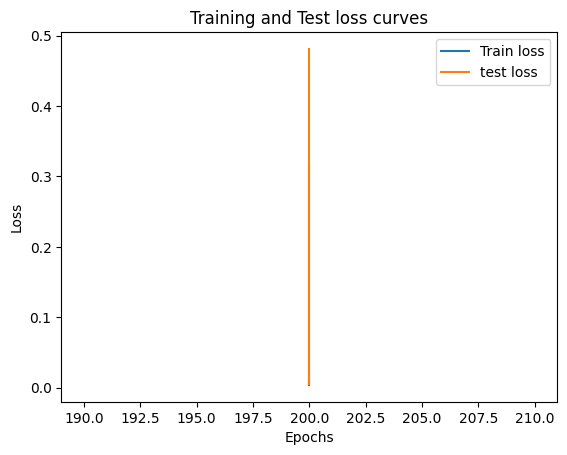

In [ ]:
import numpy as np

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values,label="test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

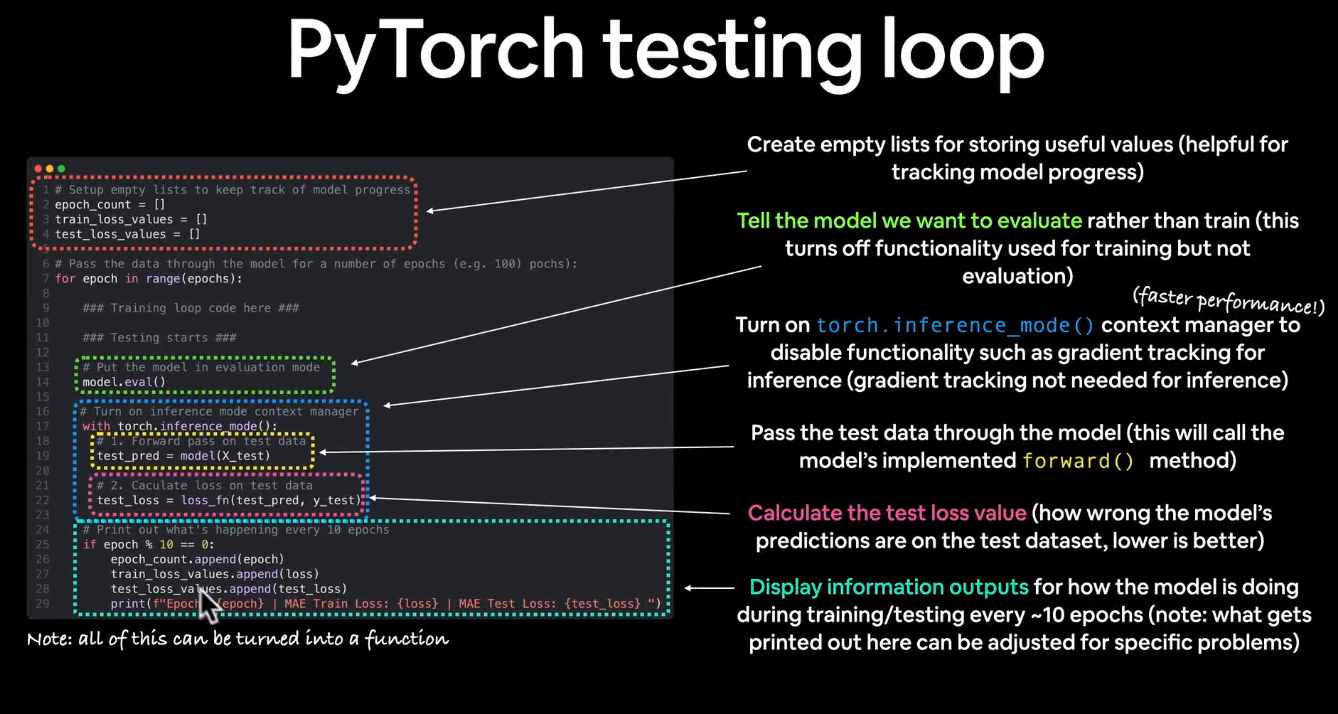

## **Saving a model**

There are three main methods you should know about saving and loading models in PyTorch.

1.  `torch.save()` : allows you to save a PyTorch object in Pythos's Pickle format
2.  `torch.load()` : allows you to load a saved PyTorch object
3.  `torch.nn.Module.load_state_dict()` : this allows to load a model's saved state dictionary


In [ ]:
# saving our PyTorch model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=False,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_O.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import os

# Create a folder in the root directory
# !mkdir -p "/content/drive/My Drive/dlpt resources"

#Day 7

##**Loading a PyTorch model**

Since we saved our model's `state.dict()` rarher than the entire model, we'll create a new instance of out model class and load state_dict() into that

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance a new instance of our model class
loaded_model_O = LinearRegressionModel()


# Load the saved state_dict of model_O (this will update the new instance with updated parameter)
loaded_model_O.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions withour loaded model
loaded_model_O.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_O(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_O.eval()
with torch.inference_mode():
  y_preds = model_O(x_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## **Put it all together**



In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

### 7.1 **Create device-agnostic code**

This means if we've got access to GPU, out code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device {device}")


using device cpu


### 7.2 **Data**

In [ ]:
# Create some data using the linear regression formula of y =  weight * X + bias
weight = 0.7
bias =  0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
x  = torch.arange(start, end,step).unsqueeze(dim = 1)

y= weight * x + bias

In [ ]:
#  Split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

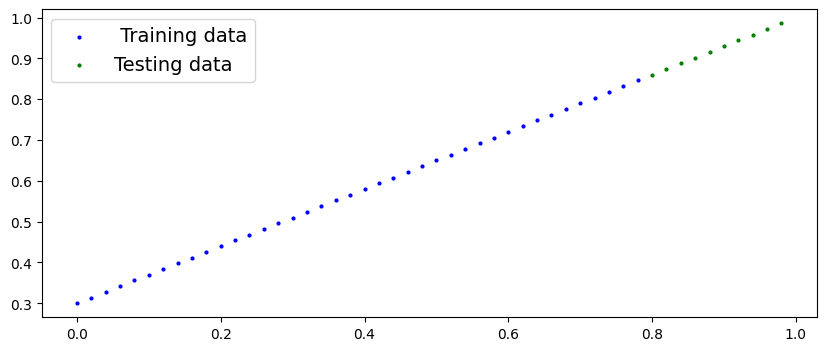

In [ ]:
# Plot data
plot_predictions(x_train,y_train)

### 7.3  **Building a PyTroch model**

In [ ]:
# Building a PyTorch model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
      return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 7.4 **Training**

for training we need:
   *  Loss function
   *  Optimizer
   *  Training loop
   *  Testing loop

In [ ]:
# Setup loss function
loss_fn= nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.01,)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)
epochs = 200

# Put data on the target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_pred = model_1(x_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred,y_test)

    # Print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 7.5  **testing and evaluating data**



In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

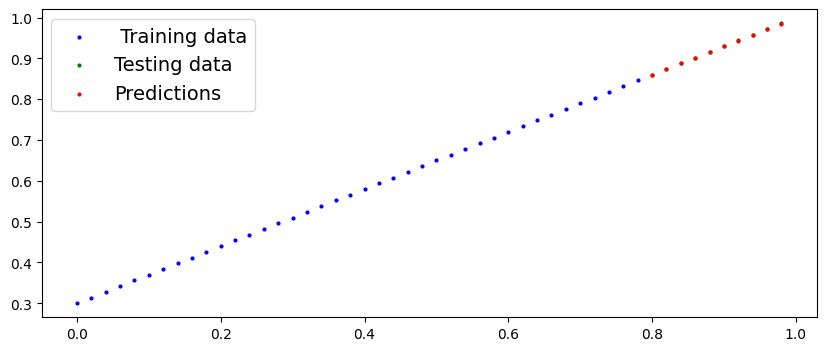

In [ ]:
#  Check out model predictions visually
plot_predictions(predictions= y_preds)

### 7.6 **Saving and loading trained model**

In [ ]:
from pathlib import Path

# 1. Create models directory
Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok= True)


# 2. Create model save path
Model_name = "01_pytorch_workflow_model_1.pth"
Model_save_path= Model_path / Model_name

# 3.  save the model state dict
print(f"Saving model to: {Model_save_path}")
torch.save(obj=model_1.state_dict(),f=Model_save_path)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a PyTorch

loaded_model_1 = LinearRegressionModelV2()

 # Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(Model_save_path))

 # Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])